**This script performs data exploration and generates summaries for categorical columns in the Titanic dataset.**

**-**

**Bu script, veri keşfini gerçekleştirmek ve Titanic veri setindeki kategorik sütunlar için özetler oluşturur.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
#df = sns.load_dataset("titanic")
df = pd.read_csv("/kaggle/input/titanic-dataset-csv/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
###selecting category, object, and bool data types in DF
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

###selecting categorical values with numeric data type
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and 
               df[col].dtypes in ["int", "float"]]

###selecting cardinal category and object data types
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and 
               str(df[col].dtypes) in ["category", "object"]]

###output: []

cat_cols = cat_cols + num_but_cat

### checking Dataframe df with new variables

df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [3]:
###function to display the count and ratio of each unique value

def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

### Loop - for all cols

#for col in cat_cols:
#    cat_summary(df, col)


### Applying the function to the 'sex' column

cat_summary(df, "sex")

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302


***Modifying cat_summary function with countplot***

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302


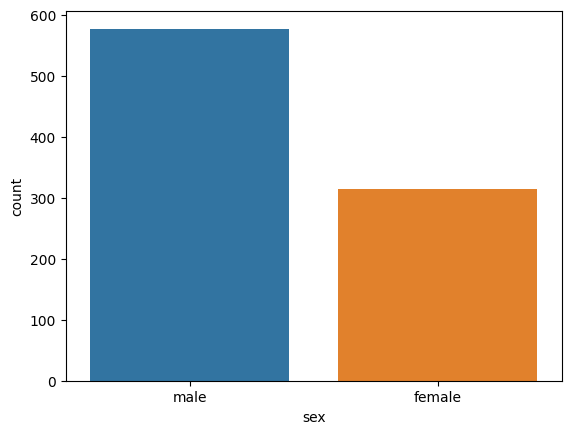

In [4]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

### Loop -for all cols

#for col in cat_cols:
#    if df[col].dtypes == "bool":
#        df[col] = df[col].astype(int)
#        cat_summary(df, col, plot=True)
#    else:
#        cat_summary(df, col, plot=True)


cat_summary(df, "sex", plot=True)

**This script performs data exploration and generates summaries for numerical columns in the Titanic dataset.**

**-**

**Bu script, veri keşfini gerçekleştirmek ve Titanic veri setindeki numerik sütunlar için özetler oluşturur.**

In [5]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]

num_cols = [col for col in num_cols if col not in cat_cols]

def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

num_summary(df, "age")

### Loop -for all cols

#for col in num_cols:
#    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


***Modifying num_summary function with countplot***

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


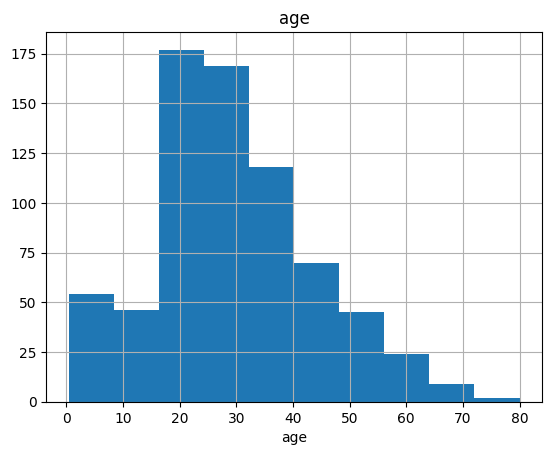

In [6]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


### Loop -for all cols

#    for col in num_cols:
#        num_summary(df, col, plot=True)

num_summary(df, "age", plot=True)